In [ ]:
import numpy as np
import pandas as pd

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
df = pd.read_csv(url)
df.to_csv('yellow-tripdata.csv', index = False)


In [44]:
df

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


In [47]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
df = df.drop(['improvement_surcharge', 'payment_type','store_and_fwd_flag', 'VendorID'],axis=1)
df

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,mta_tax,tolls_amount,tip_amount
0,1,17.63,2,132,164,70.0,0.5,6.94,16.54
1,1,19.52,2,132,236,70.0,0.5,6.94,16.19
2,1,17.81,2,132,48,70.0,0.5,6.94,12.00
3,2,19.30,2,132,148,70.0,0.5,0.00,5.00
4,1,18.75,2,132,234,70.0,0.5,6.94,10.00
...,...,...,...,...,...,...,...,...,...
41197,1,16.94,2,132,164,70.0,0.5,6.94,5.00
41198,4,19.83,2,132,166,70.0,0.5,6.94,8.00
41199,1,17.31,2,132,137,70.0,0.5,6.94,8.00
41200,1,17.28,2,132,233,70.0,0.5,6.94,16.19


In [48]:
corr_data = df.corr()['tip_amount'].drop('tip_amount')
corr_data

,tip_amount
passenger_count,0.015081
trip_distance,0.101819
RatecodeID,0.094075
PULocationID,-0.023086
DOLocationID,0.024348
fare_amount,0.200638
mta_tax,-0.054488
tolls_amount,0.116172


<Axes: >

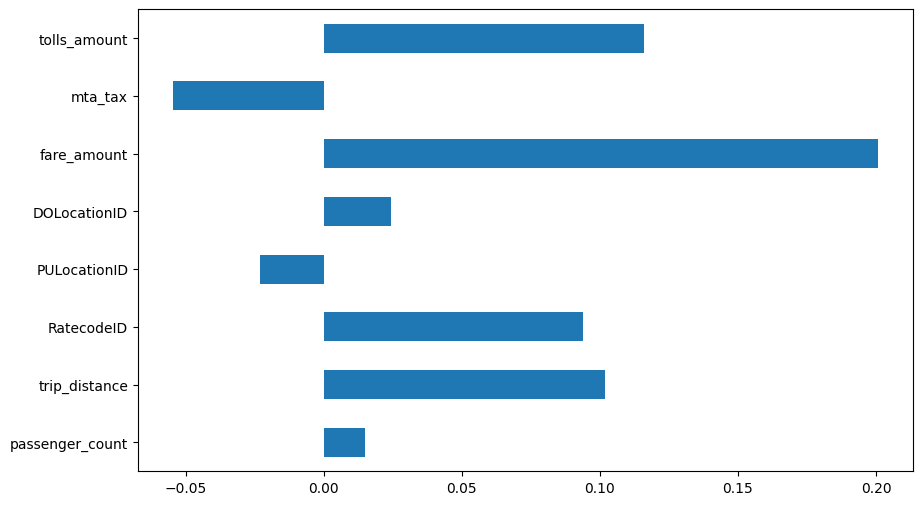

In [49]:
corr_data.plot(kind='barh', figsize=(10,6))

In [50]:
y =df['tip_amount'].values.astype(dtype='float64')
y.shape

(41202,)

In [51]:
proc_data = df.drop('tip_amount', axis=1)
X = proc_data.values
X = normalize(X,axis=1, norm='l1',copy=False)
X.shape

(41202, 8)

In [64]:
train_X, test_X, train_y, test_y  = train_test_split(X,y,test_size=0.3, random_state=42)
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(28841, 8) (28841,)
(12361, 8) (12361,)


In [65]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dc_tree = DecisionTreeRegressor(criterion='squared_error',
                                max_depth=4,
                                random_state=35)
dc_tree.fit(train_X, train_y)


DecisionTreeRegressor(max_depth=4, random_state=35)

In [66]:
y_pred = dc_tree.predict(test_X)
print('R2 Score: {:.3f}'.format(r2_score(test_y, y_pred)))
print('MSE: {:.3f}'.format(mean_squared_error(test_y, y_pred)))

R2 Score: 0.031
MSE: 24.468


In [55]:
corr_data = df.corr()['tip_amount'].drop('tip_amount')
abs(corr_data).sort_values(ascending=False)[:3]

,tip_amount
fare_amount,0.200638
tolls_amount,0.116172
trip_distance,0.101819


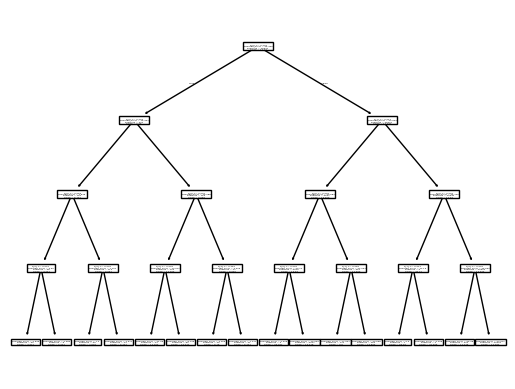

In [60]:
plot_tree(dc_tree)
plt.show()

***ENTIRE CODE FOR REGRESSION TREE***

R^2 Score: 0.028
MSE: 24.555


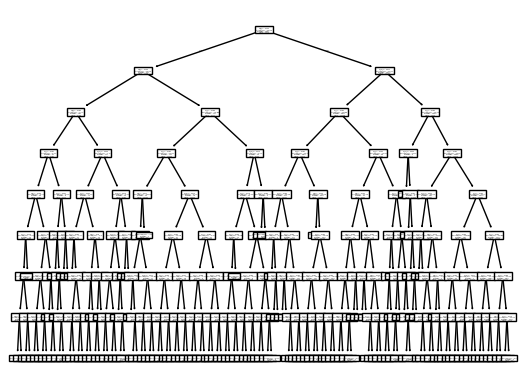

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

def regression_tree(df, test_size, max_depth):
  if(df.isnull().any().any()):
    if(error != 'ignore'):
      raise ValueError('Dataframe contains null values')
  else:
    corr_data = df.corr()['tip_amount'].drop('tip_amount')
    y = df['tip_amount'].values.astype(dtype='float64')
    proc_data = df.drop('tip_amount',axis=1)
    X = normalize(proc_data.values, axis=1, norm='l1', copy = False)

    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=test_size, random_state=42)
    dc_tree = DecisionTreeRegressor(criterion='squared_error',
                                    max_depth=max_depth,
                                    random_state=35)
    dc_tree.fit(train_X, train_y)
    y_pred = dc_tree.predict(test_X)
    print('R^2 Score: {:.3f}'.format(r2_score(test_y, y_pred)))
    print('MSE: {:.3f}'.format(mean_squared_error(test_y, y_pred)))

    plot_tree(dc_tree)
    plt.show()


df = pd.read_csv('yellow-tripdata.csv')
regression_tree(df,0.3,8)